# Statistics for low number of experimental repetitions

Davi R. Ortega

It is a common problem to make statistical tests in Biology. Each experiment is time consuming and more often than not, we see papers reporting bar plots with error bars calculated from n=3 experiments. Maybe even worse is the use of parametric tests (tests that assume that the distribution of the data is normal) to validate statistical significance of differences in the averages when comparing two settings, each repeated three times.

Here, we will show:
* how low sampling can be misleading
* better ways to report uncertainty
* How parametric tests can be misleading
* better alternatives to "put a number" in how different are two sets of measurements.


Let's start from a completely hypothetical story that we know the real truth prior to our experiment. Let's suppose that the entire population of two new species of bacteria have been discovered: A, B. Now, we will characterize their size.  

In [1]:
import numpy
import pandas
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", palette="muted", color_codes=True)
        
class Population (object):
    "Define the population class."
    def __init__(self, name, sizes = [], color = 'b'):
        "Initialize attributes"
        self.name = name
        self.sizes = numpy.array(sizes)
        self.aveSiz = numpy.average(sizes)
        self.sortSiz = numpy.sort(self.sizes)
        self.color = color
        self.stored = []

    def storeSample(self, n):
        "Initialize methods"
        self.stored = numpy.random.choice(self.sizes, n)
        return self.stored
    
    def showSum(self):
        import seaborn as sns
        import matplotlib.pyplot as plt

        sns.set(style="white", palette="muted", color_codes=True)
        f, axes = plt.subplots(1, 3, figsize=(10, 3))
        
        sns.distplot(self.sizes, kde=False, color=self.color, ax=axes[0], axlabel = 'hist')
        sns.violinplot(data = self.sizes, ax=axes[1], color=self.color)
        axes[2].plot(self.sortSiz, color=self.color)
        plt.show()

def compare(A, B):
    import seaborn as sns
    import matplotlib.pyplot as plt

    sns.set(style="white", palette="muted", color_codes=True)
    
    AB = pandas.DataFrame({ A.name : A.sizes, B.name: B.sizes})
    ABmelt = pandas.melt(AB)
    ABmelt['sample'] = 'yes'
    f, axes = plt.subplots(1, 3, figsize=(10, 3))
    sns.violinplot(data = AB, ax=axes[0])
    sns.violinplot(data = ABmelt, ax=axes[1], split = True, x = 'sample', y = 'value', hue = 'variable', palette={ A.name: A.color, B.name: B.color})
    plt.show()
    
    return AB

def samplePops(pops = [], n = 3):
    for pop in pops:
        pop.storeSample(n)
        print('Population {:s} => {:.2} +- {:.2}'.format(pop.name, pop.stored.mean(), pop.stored.std()))
    return None

def plotSample(pops = []):
    import seaborn as sns
    import matplotlib.pyplot as plt

    sns.set(style="white", palette="muted", color_codes=True)
    stored = []
    for pop in pops:
        stored.append(pop.stored)
    f, axes = plt.subplots(1, 2, figsize=(10, 3))
    sns.barplot(data = stored, ax = axes[0])
    sns.swarmplot(data = stored, ax = axes[1])
    plt.show()

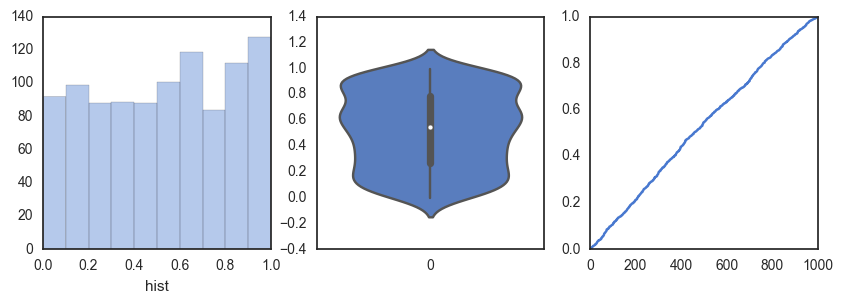

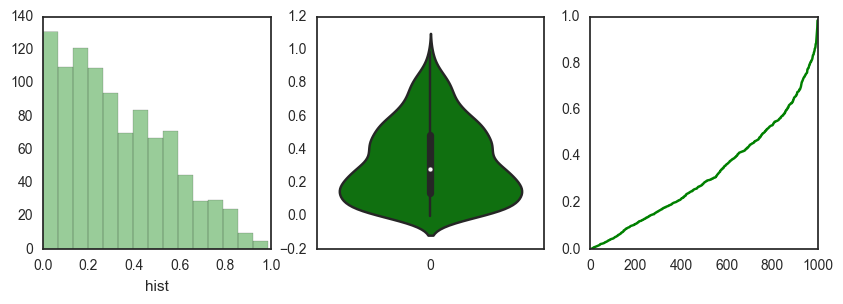

In [2]:
distr = numpy.random.beta(1, 0.9, 1000)
A = Population('A', distr, 'b')
A.showSum()

distrB = numpy.random.beta(1, 2, 1000)
B = Population('B', distrB, 'green')
B.showSum()

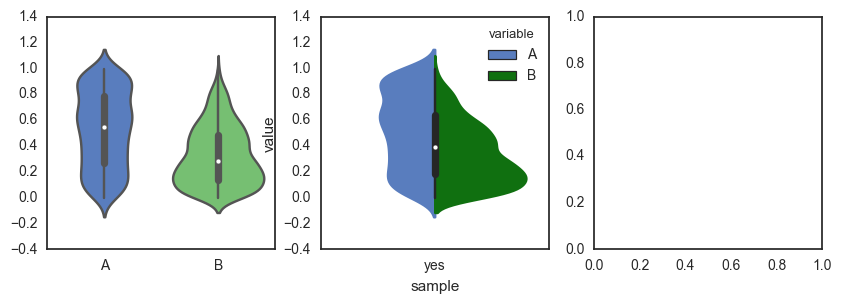

In [3]:
AB = compare(A, B)

Now that we have out populations, let's sample them 3 times, calculate some statistics and plot the results. But since we are making an in silica experiment, let's do it 10 times. And perform several significance tests.

Population A => 0.35 +- 0.18
Population B => 0.11 +- 0.089


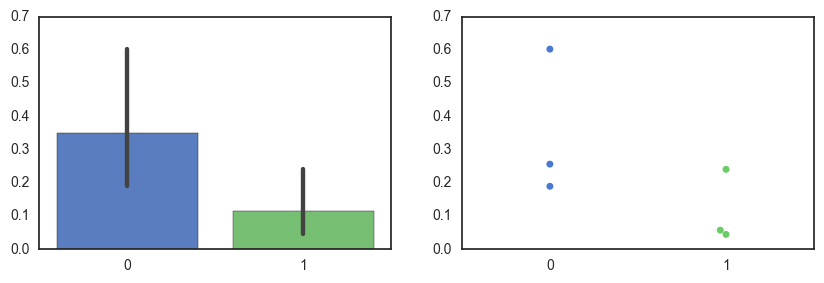

Population A => 0.53 +- 0.16
Population B => 0.18 +- 0.071


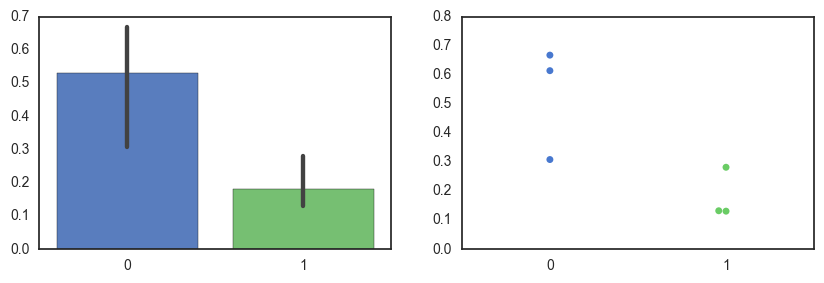

Population A => 0.4 +- 0.073
Population B => 0.33 +- 0.35


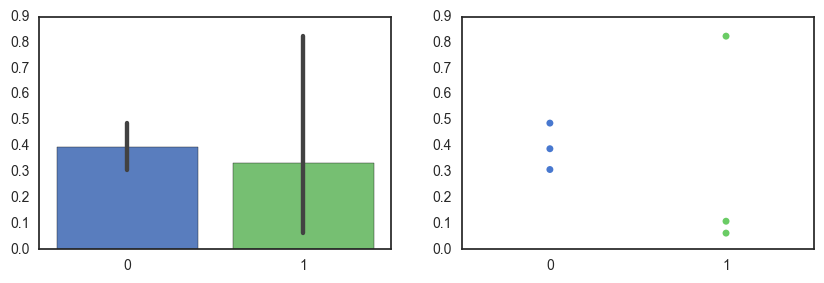

Population A => 0.46 +- 0.23
Population B => 0.28 +- 0.14


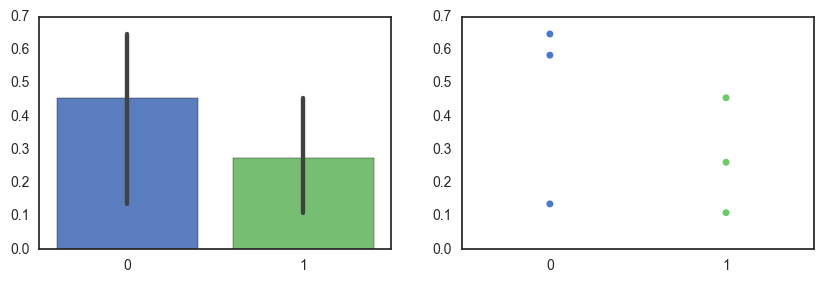

Population A => 0.43 +- 0.13
Population B => 0.31 +- 0.21


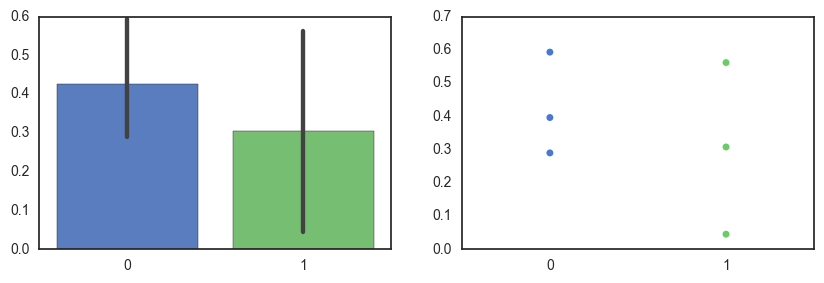

Population A => 0.29 +- 0.35
Population B => 0.13 +- 0.12


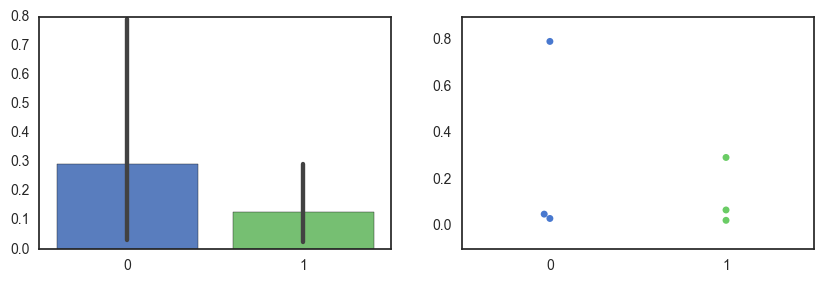

Population A => 0.15 +- 0.03
Population B => 0.19 +- 0.13


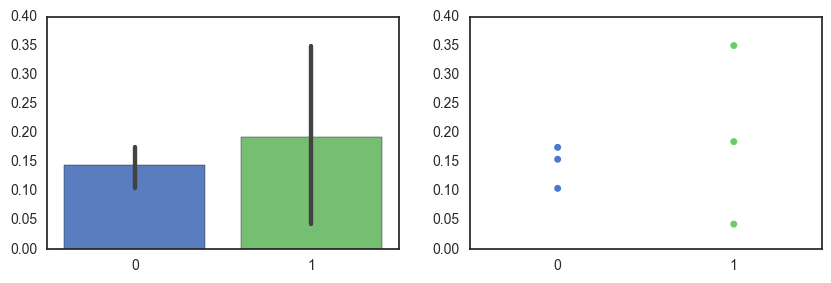

Population A => 0.65 +- 0.26
Population B => 0.54 +- 0.34


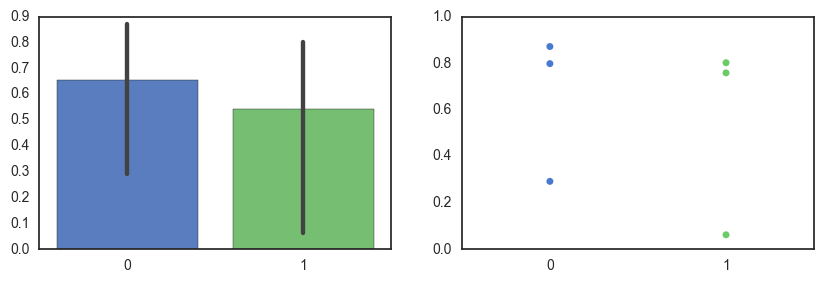

Population A => 0.49 +- 0.37
Population B => 0.26 +- 0.12


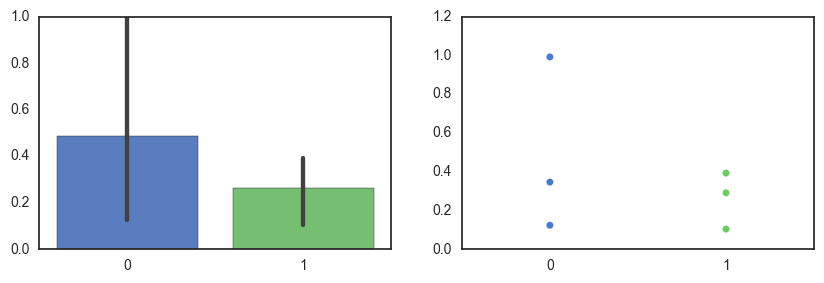

Population A => 0.58 +- 0.17
Population B => 0.31 +- 0.27


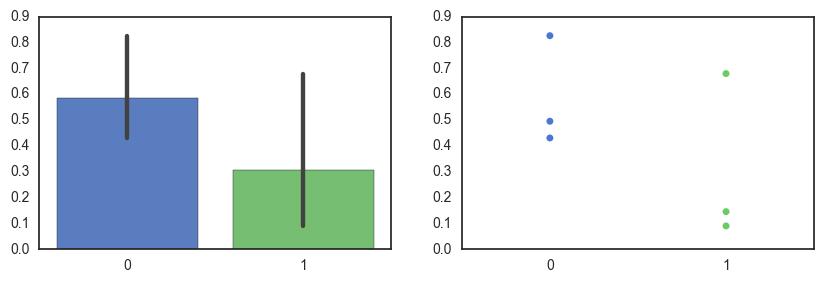

In [4]:
for i in range(10):
    samplePops([A, B], 3)
    plotSample([A, B])